In [4]:
import numpy as np
from sklearn.datasets import fetch_openml

In [12]:
X, y = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    data_home="./datasets/mnist",
    as_frame=False,
)
X.shape, y.shape

((70000, 784), (70000,))

In [23]:
import matplotlib.pyplot as plt


def plot_digit(digit):
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap="binary")
    plt.axis("off")

(None, '5')

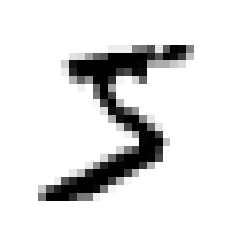

In [25]:
plot_digit(X[0]), y[0]

In [27]:
y = y.astype(np.uint)

In [35]:
y[0]

5

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [39]:
y_pred = knn.predict(X_test)

In [40]:
knn.score(X_test, y_test)

0.9691428571428572

In [42]:
sum(y_pred == y_test) / len(y_test)

0.9691428571428572

In [52]:
import math

from sklearn.model_selection import GridSearchCV

knn_params = {
    "n_neighbors": np.arange(5, 30, 5),
    "leaf_size": np.arange(10, 100, 10),
    "p": [1, 2],
}

cv = GridSearchCV(knn, knn_params, n_jobs=-1)
cv

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=10), n_jobs=-1,
             param_grid={'leaf_size': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'n_neighbors': array([ 5, 10, 15, 20, 25]),
                         'p': [1, 2]})

In [ ]:
%%time

cv.fit(X_train, y_train)

In [ ]:
cv.cv_results_

In [ ]:
cv.best_params_

In [ ]:
cv.best_scores_